In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress 
from scipy.stats import sem
import matplotlib.pyplot as plt


In [2]:
city_pay_df = pd.read_csv("./output_data/fiscal_2023.csv")
city_pay_df.head()

,Unnamed: 0,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid
0,5109775,2023,OFFICE OF THE MAYOR,04/26/2021,MANHATTAN,RESEARCH PROJECTS COORD,ACTIVE,70747.0,per Annum,1820.0,70553.08
1,5109776,2023,OFFICE OF THE MAYOR,01/04/2022,MANHATTAN,SPECIAL ASSISTANT,ACTIVE,80651.0,per Annum,1820.0,78595.96
2,5109780,2023,OFFICE OF THE MAYOR,01/01/2022,MANHATTAN,MAYOR,ACTIVE,258750.0,per Annum,1820.0,258041.16
3,5109781,2023,OFFICE OF THE MAYOR,02/18/2020,MANHATTAN,SECRETARY,ACTIVE,60000.0,per Annum,1820.0,59660.28
4,5109783,2023,OFFICE OF THE MAYOR,01/03/2022,MANHATTAN,EXECUTIVE AGENCY COUNSEL,ACTIVE,225000.0,per Annum,1820.0,224383.64


In [3]:
city_pay_df.columns

Index(['Unnamed: 0', 'Fiscal Year', 'Agency Name', 'Agency Start Date',
       'Work Location Borough', 'Title Description',
       'Leave Status as of June 30', 'Base Salary', 'Pay Basis',
       'Regular Hours', 'Regular Gross Paid'],
      dtype='object')

In [4]:
fiscal_city_pay = city_pay_df.loc[city_pay_df['Fiscal Year'] == 2023]
fiscal_city_pay = fiscal_city_pay.loc[fiscal_city_pay['Leave Status as of June 30'] == 'ACTIVE']
fiscal_city_pay = fiscal_city_pay.loc[fiscal_city_pay['Regular Hours'] >= 1664]
fiscal_city_pay = fiscal_city_pay.loc[fiscal_city_pay['Regular Gross Paid'] >= fiscal_city_pay['Base Salary']*0.75]
fiscal_city_pay = fiscal_city_pay.loc[fiscal_city_pay['Pay Basis'] == 'per Annum']
fiscal_city_pay = fiscal_city_pay.loc[fiscal_city_pay['Agency Name'] != 'DEPARTMENT FOR THE AGING']

fiscal_city_pay = fiscal_city_pay[['Fiscal Year',
       'Agency Name', 'Work Location Borough',
       'Leave Status as of June 30', 'Base Salary', 'Pay Basis',
       'Regular Hours', 'Regular Gross Paid']]
fiscal_city_pay.head()

,Fiscal Year,Agency Name,Work Location Borough,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid
0,2023,OFFICE OF THE MAYOR,MANHATTAN,ACTIVE,70747.0,per Annum,1820.0,70553.08
1,2023,OFFICE OF THE MAYOR,MANHATTAN,ACTIVE,80651.0,per Annum,1820.0,78595.96
2,2023,OFFICE OF THE MAYOR,MANHATTAN,ACTIVE,258750.0,per Annum,1820.0,258041.16
3,2023,OFFICE OF THE MAYOR,MANHATTAN,ACTIVE,60000.0,per Annum,1820.0,59660.28
4,2023,OFFICE OF THE MAYOR,MANHATTAN,ACTIVE,225000.0,per Annum,1820.0,224383.64


In [5]:
fiscal_city_pay = fiscal_city_pay.sort_values(by='Regular Gross Paid', ascending=False)
fiscal_city_pay.head(30)

,Fiscal Year,Agency Name,Work Location Borough,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid
671,2023,BOARD OF ELECTION,MANHATTAN,ACTIVE,204616.0,per Annum,1820.00,409058.38
146361,2023,NYC HOUSING AUTHORITY,MANHATTAN,ACTIVE,350000.0,per Annum,1820.00,327868.54
102741,2023,DEPARTMENT OF EDUCATION ADMIN,MANHATTAN,ACTIVE,67810.0,per Annum,1872.00,286465.08
90455,2023,COMMUNITY COLLEGE (QUEENSBORO),QUEENS,ACTIVE,280908.0,per Annum,1820.00,285389.05
92211,2023,COMMUNITY COLLEGE (LAGUARDIA),QUEENS,ACTIVE,280908.0,per Annum,1820.00,285389.05
91071,2023,COMMUNITY COLLEGE (KINGSBORO),BROOKLYN,ACTIVE,280908.0,per Annum,1820.00,285256.90
89945,2023,COMMUNITY COLLEGE (BRONX),QUEENS,ACTIVE,280908.0,per Annum,1820.00,285256.42
98963,2023,DEPARTMENT OF EDUCATION ADMIN,MANHATTAN,ACTIVE,67810.0,per Annum,1853.05,284630.02
91933,2023,COMMUNITY COLLEGE (HOSTOS),BRONX,ACTIVE,283560.0,per Annum,1820.00,282706.86
91568,2023,COMMUNITY COLLEGE (MANHATTAN),MANHATTAN,ACTIVE,280500.0,per Annum,1820.00,279656.06


In [6]:
fiscal_city_pay = fiscal_city_pay.dropna()
fiscal_city_pay['Regular Gross Paid'].min()

25166.14

In [7]:
#fiscal_city_pay.to_csv("output_data/fiscal_2020.csv")
fiscal_city_pay['Regular Gross Paid'].max()

409058.38

In [8]:
plot_data = fiscal_city_pay.groupby('Agency Name')
plot_data

In [9]:
quartiles = fiscal_city_pay['Regular Gross Paid'].quantile([0.25,0.5,0.75])
quartiles

0.25    53074.0425
0.50    80050.1000
0.75    92039.3475
Name: Regular Gross Paid, dtype: float64

In [10]:
outliers = []


lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of salary is: {lowerq}")
print(f"The upper quartile of salary is: {upperq}")
print(f"The interquartile range of salaries is: {iqr}")
print(f"The the median salary is: {quartiles[0.5]} ")
print(f"Salaries below {lower_bound} could be outliers.")
print(f"Salaries above {upper_bound} could be outliers.")

#for salary in salaries:
salary_outlier = city_pay_df.loc[(city_pay_df['Regular Gross Paid'] > upper_bound)]
salary_outlier.sort_values(by='Regular Gross Paid', ascending=False)
    

The lower quartile of salary is: 53074.042499999996
The upper quartile of salary is: 92039.3475
The interquartile range of salaries is: 38965.30500000001
The the median salary is: 80050.1 
Salaries below -5373.915000000015 could be outliers.
Salaries above 150487.30500000002 could be outliers.


,Unnamed: 0,Fiscal Year,Agency Name,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid
671,5111038,2023,BOARD OF ELECTION,01/26/2015,MANHATTAN,ADMINISTRATIVE MANAGER,ACTIVE,204616.0,per Annum,1820.0,409058.38
146361,5649501,2023,NYC HOUSING AUTHORITY,02/18/2020,MANHATTAN,EXECUTIVE AGENCY COUNSEL,ACTIVE,350000.0,per Annum,1820.0,327868.54
102741,5300746,2023,DEPARTMENT OF EDUCATION ADMIN,08/19/2019,MANHATTAN,COMMUNITY COORDINATOR,ACTIVE,67810.0,per Annum,1872.0,286465.08
92211,5281341,2023,COMMUNITY COLLEGE (LAGUARDIA),08/17/2020,QUEENS,PRESIDENT,ACTIVE,280908.0,per Annum,1820.0,285389.05
90455,5271666,2023,COMMUNITY COLLEGE (QUEENSBORO),08/17/2020,QUEENS,PRESIDENT,ACTIVE,280908.0,per Annum,1820.0,285389.05
...,...,...,...,...,...,...,...,...,...,...,...
109607,5583699,2023,DEPT OF HEALTH/MENTAL HYGIENE,07/01/2022,MANHATTAN,CITY MEDICAL EXAMINER,ACTIVE,156088.0,per Annum,2000.0,150528.78
109400,5583300,2023,DEPT OF HEALTH/MENTAL HYGIENE,07/01/2022,MANHATTAN,CITY MEDICAL EXAMINER,ACTIVE,156088.0,per Annum,2000.0,150528.78
108161,5581043,2023,DEPT OF HEALTH/MENTAL HYGIENE,07/01/2022,MANHATTAN,CITY MEDICAL EXAMINER,ACTIVE,156088.0,per Annum,2000.0,150528.78
126440,5607346,2023,DEPARTMENT OF SANITATION,10/09/1990,MANHATTAN,ADMIN COMMUNITY RELATIONS SPECIALIST,ACTIVE,150927.0,per Annum,1820.0,150513.48


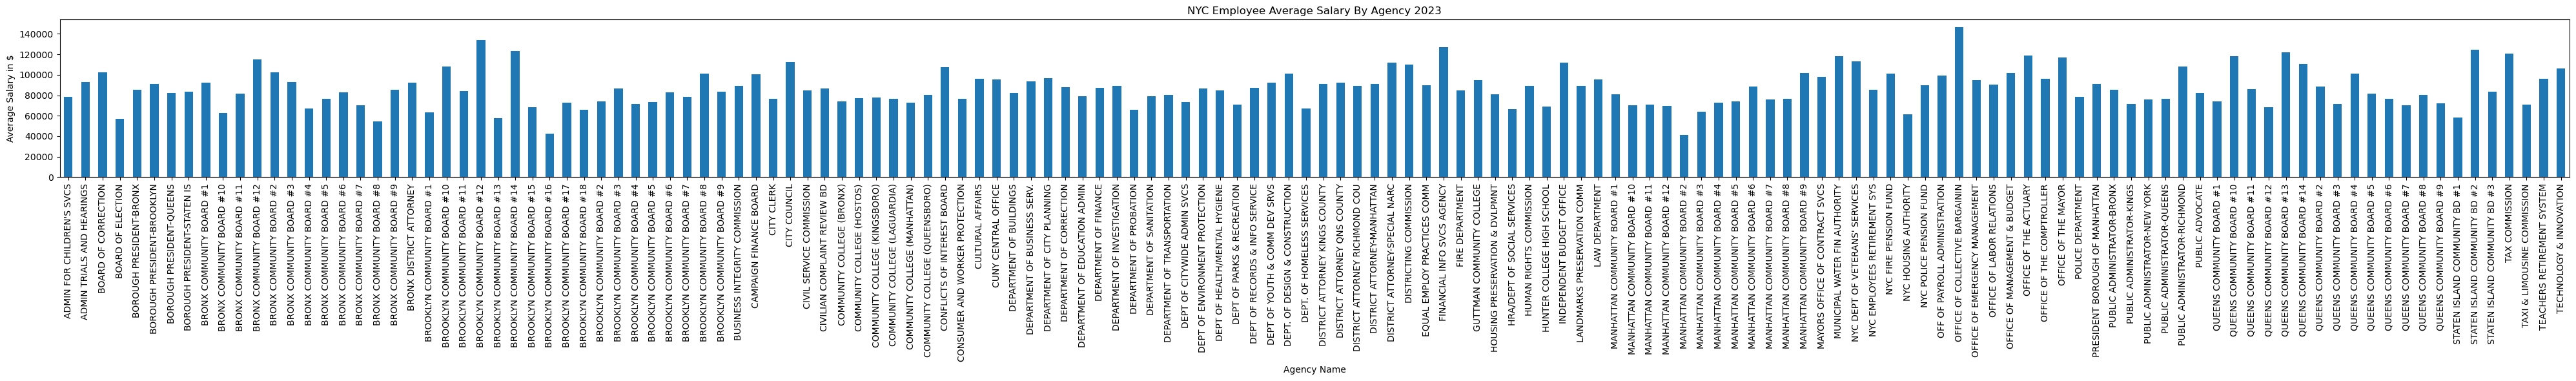

In [11]:
agency_pay = plot_data['Regular Gross Paid'].mean()
agency_pay
pay_chart = agency_pay.plot(kind='bar', figsize=(40,6))
pay_chart.set_title('NYC Employee Average Salary By Agency 2023')
pay_chart.set_xlabel('Agency Name')
pay_chart.set_ylabel('Average Salary in $')
plt.tight_layout()
plt.savefig('nyc_employee_salary.jpeg')
plt.show()



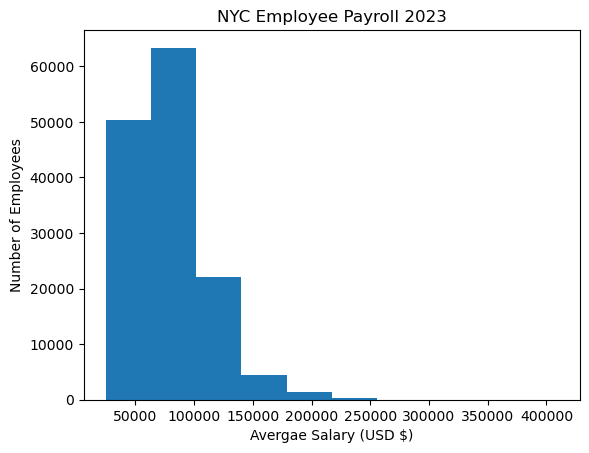

In [19]:
plt.hist(fiscal_city_pay['Regular Gross Paid'])
plt.title('NYC Employee Payroll 2023')
plt.xlabel('Avergae Salary (USD $)')
plt.ylabel('Number of Employees')
plt.savefig('nyc_employee_salary_act_histogram.jpeg')
plt.show()

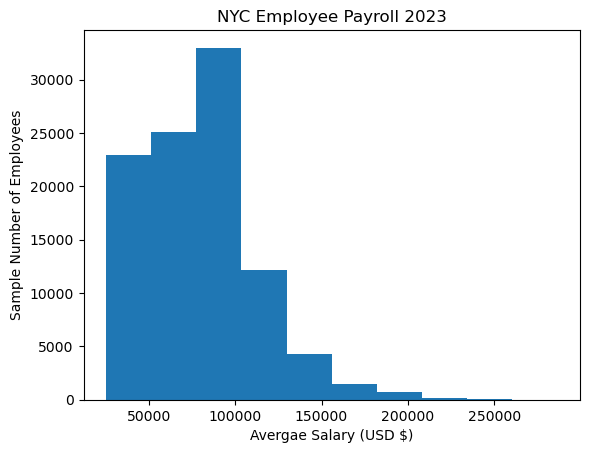

In [18]:
subset = fiscal_city_pay.sample(100000)
plt.hist(subset['Regular Gross Paid'])
plt.title('NYC Employee Payroll 2023')
plt.xlabel('Avergae Salary (USD $)')
plt.ylabel('Sample Number of Employees')
plt.savefig('sample_nyc_employee_salary_histogram.jpeg')
plt.show()

In [14]:
salary_sample_set = []
sample_size=1000
x_axis = []
for x in range(0,26):
    salary_sample_set.append(fiscal_city_pay.sample(sample_size))
    x_axis.append(sample_size)
    sample_size +=1000
salary_sample_set[0]

,Fiscal Year,Agency Name,Work Location Borough,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid
25937,2023,POLICE DEPARTMENT,BRONX,ACTIVE,53600.0,per Annum,2080.0,42842.54
56314,2023,FIRE DEPARTMENT,MANHATTAN,ACTIVE,59580.0,per Annum,2080.0,57249.91
89962,2023,COMMUNITY COLLEGE (BRONX),QUEENS,ACTIVE,60495.0,per Annum,2080.0,60329.36
123039,2023,DEPARTMENT OF SANITATION,RICHMOND,ACTIVE,83465.0,per Annum,2120.0,84744.34
118834,2023,DEPARTMENT OF SANITATION,BRONX,ACTIVE,91661.0,per Annum,2080.0,89835.62
...,...,...,...,...,...,...,...,...
72802,2023,HRA/DEPT OF SOCIAL SERVICES,BRONX,ACTIVE,54704.0,per Annum,1820.0,54554.24
59623,2023,FIRE DEPARTMENT,BROOKLYN,ACTIVE,92073.0,per Annum,2080.0,91820.82
151301,2023,NYC HOUSING AUTHORITY,MANHATTAN,ACTIVE,46278.0,per Annum,2080.0,41552.70
127526,2023,DEPARTMENT OF FINANCE,MANHATTAN,ACTIVE,90649.0,per Annum,1820.0,90792.49


In [15]:
means = [sample['Regular Gross Paid'].mean() for sample in salary_sample_set]
standard_errors = [sem(sample['Regular Gross Paid']) for sample in salary_sample_set]

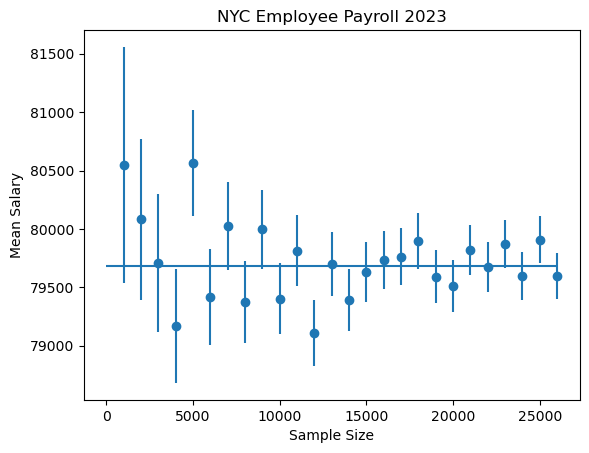

In [16]:
plt.errorbar(x_axis, means, standard_errors, fmt="o")
plt.hlines(fiscal_city_pay['Regular Gross Paid'].mean(),0,max(x_axis))
plt.title('NYC Employee Payroll 2023')
plt.xlabel('Sample Size')
plt.ylabel('Mean Salary')
plt.savefig('std_error_sample_nyc_employee_salary.jpeg')
plt.show()

In [17]:
x_value = fiscal_city_pay
y_value = plot_data['Regular Gross Paid'].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.plot(y_value)
plt.xlabel('Agency Name')
plt.ylabel('Average Regular Gross Paid')
plt.show

NameError: name 'x_values' is not defined